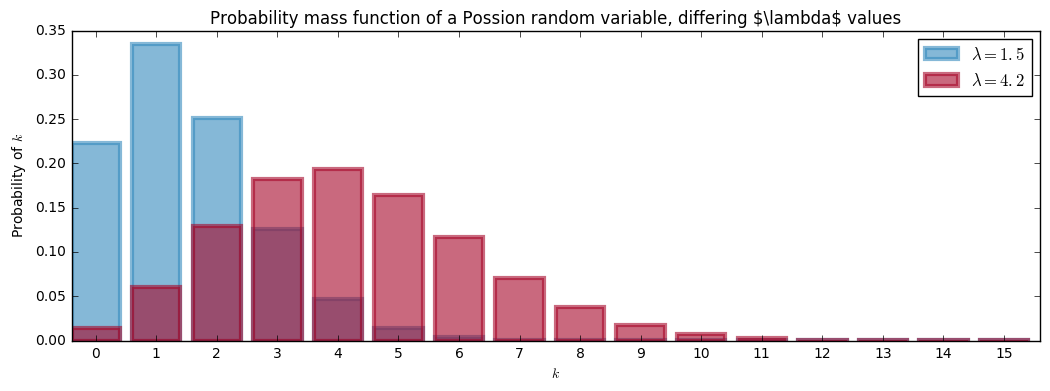

Populating the interactive namespace from numpy and matplotlib


/Users/greg/lib/anaconda2/envs/testcaffe/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%pylab inline

import scipy.stats as stats

figsize (12.5,4)
colors =['#348ABD', '#A60628']
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
plt.bar(a,
        poi.pmf(a, lambda_[0]),
        color=colors[0],
        label="$\lambda = %.1f$" % lambda_[0],
        alpha=0.60,
        edgecolor=colors[0],
        lw="3")
plt.bar(a,
        poi.pmf(a, lambda_[1]),
        color=colors[1],
        label="$\lambda = %.1f$" % lambda_[1],
        alpha=0.60,
        edgecolor=colors[1],
        lw="3")

plt.xticks(a +0.4, a)
plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Possion random variable, differing \$\lambda$ values")

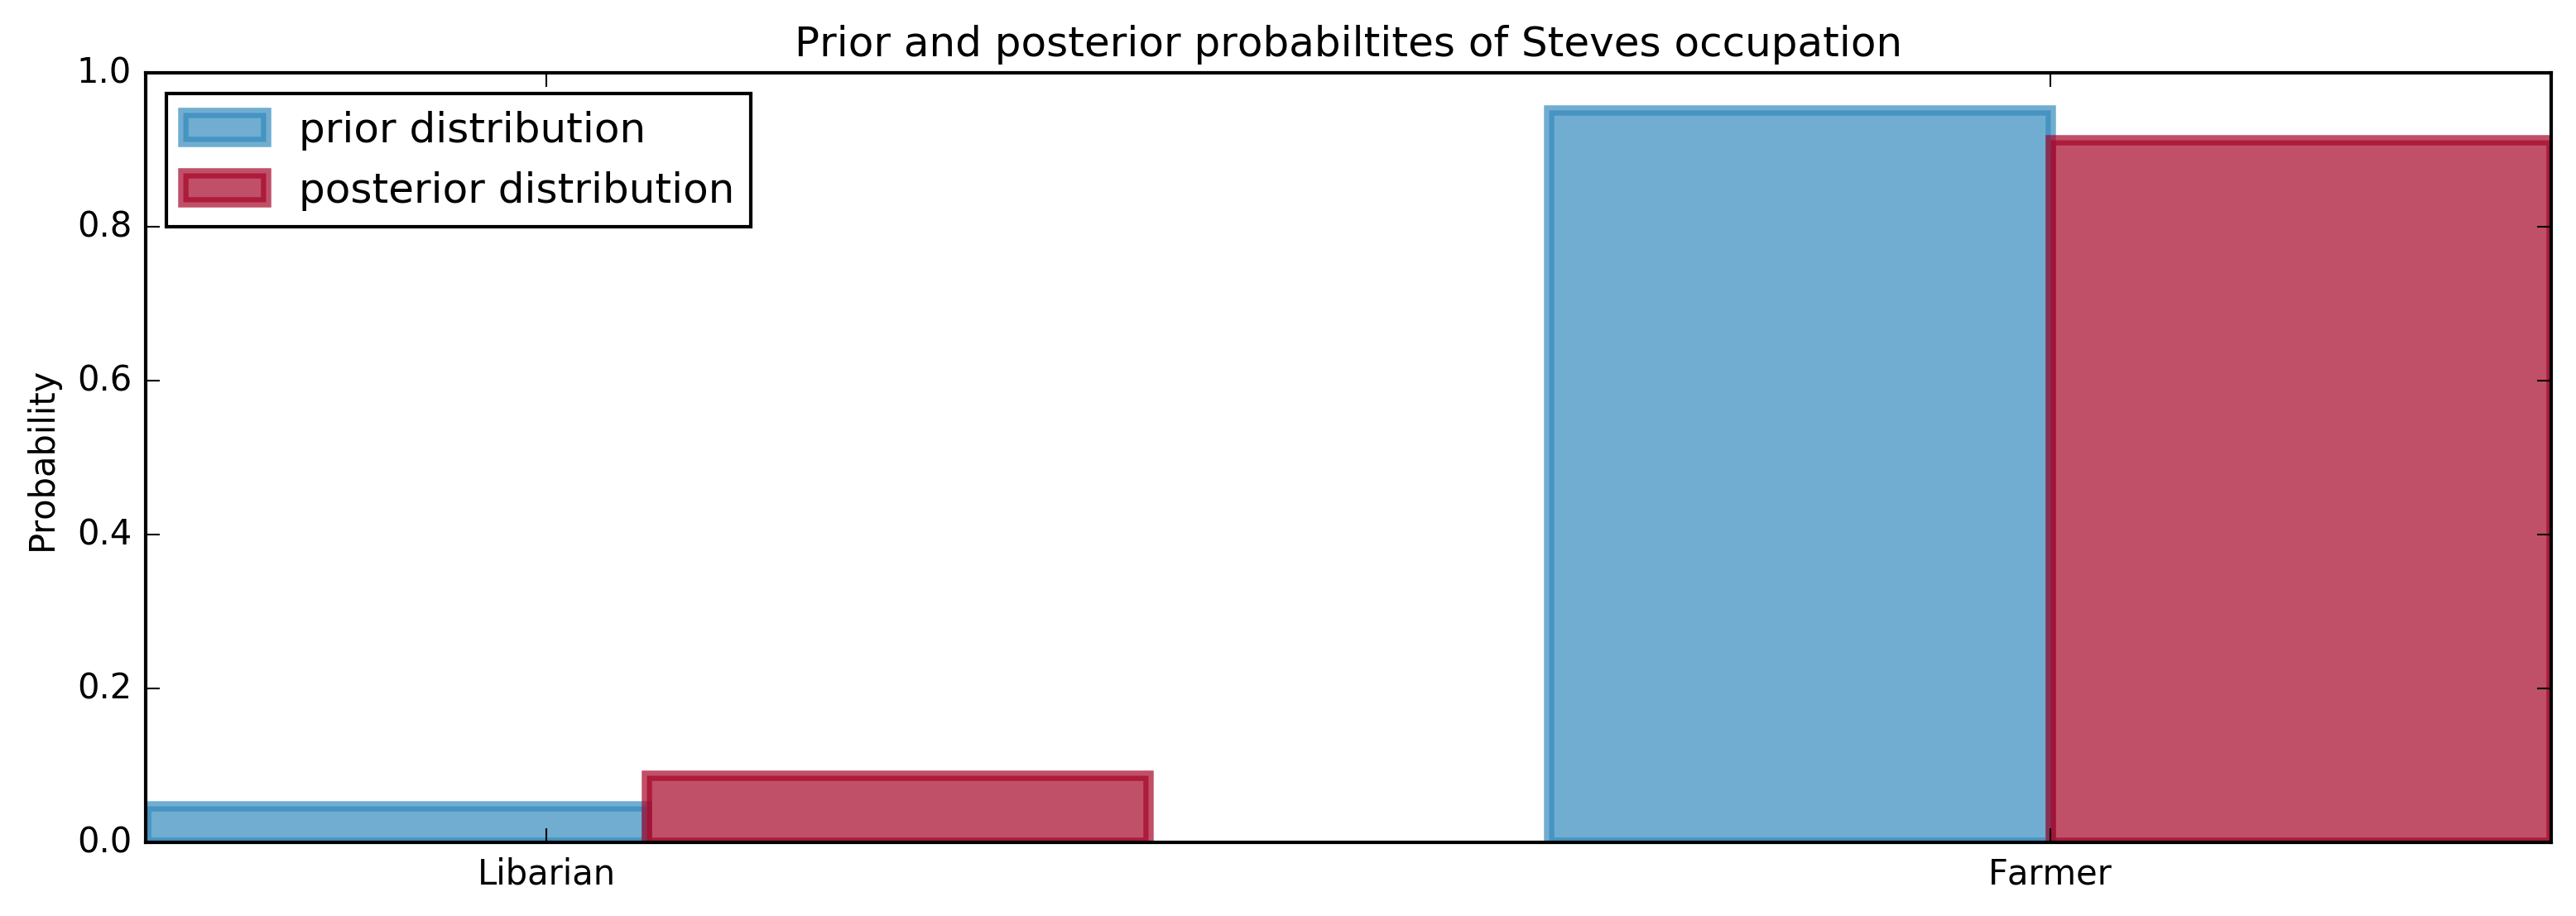

In [3]:
%matplotlib inline

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi']= 300
colors = ['#348ABD', '#A60628']
prior = [1/21., 20/21.]
posterior = [0.087, 1-0.087]
plt.bar([0, .7], prior, alpha=0.7, width=0.25, color=colors[0], label='prior distribution', lw='3', edgecolor=colors[0])
plt.bar([0 + 0.25, .7 + 0.25], posterior, alpha=0.7, width=0.25, color=colors[1], label='posterior distribution', lw='3', edgecolor=colors[1])

plt.xticks ([0.2,0.95], ['Libarian', 'Farmer'])
plt.title('Prior and posterior probabiltites of Steve''s occupation')
plt.ylabel('Probability')
plt.legend(loc='upper left')

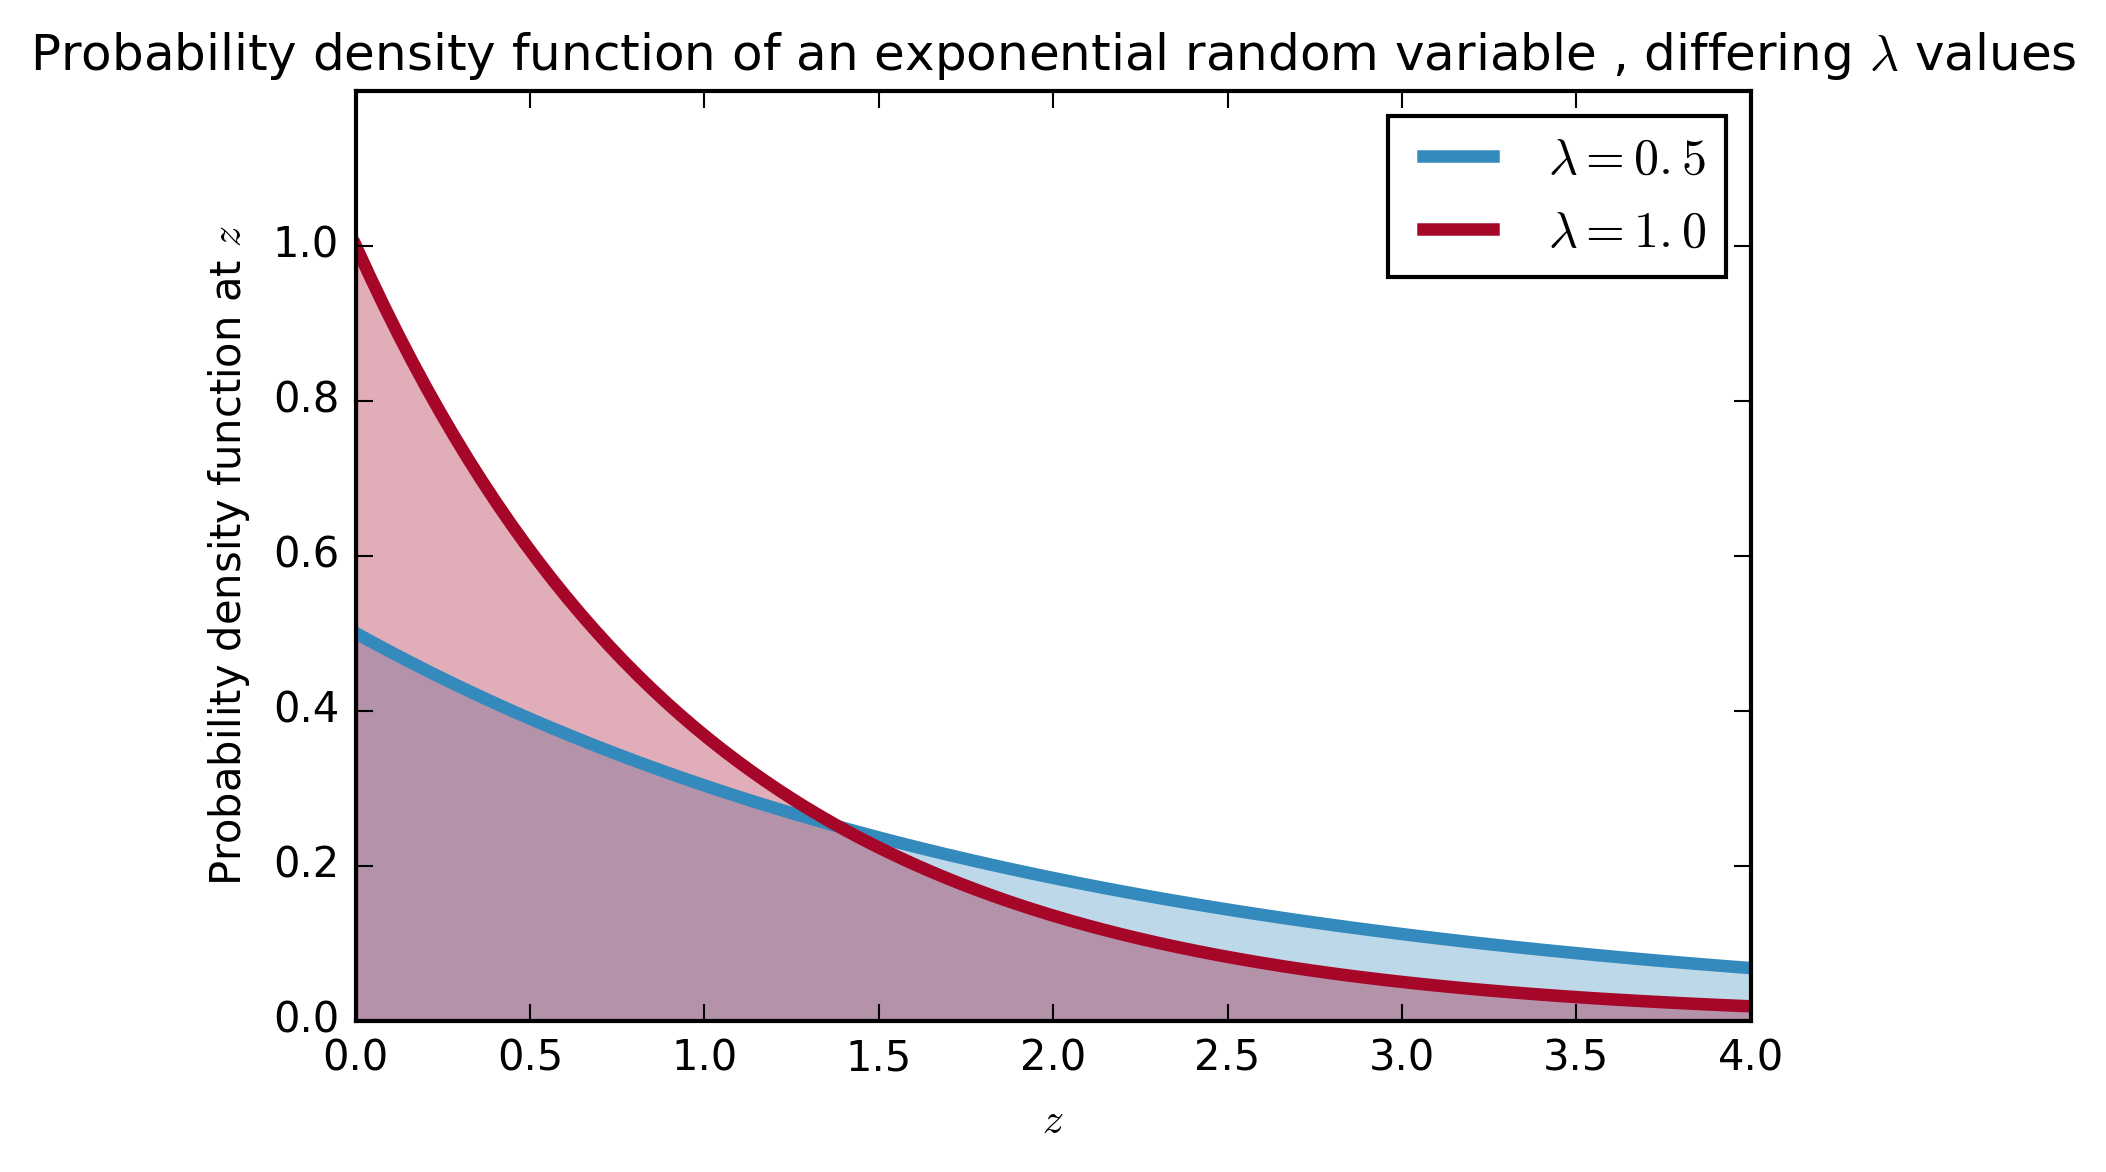

/Users/greg/lib/anaconda2/envs/testcaffe/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


In [4]:
%matplotlib inline
%pylab inline

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

a = np.linspace(0,4,100)
expo = stats.expon
lambda_ =  [0.5, 1]
colors = ['#348ABD', '#A60628']
for l, c in zip(lambda_, colors):
  plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
           color=c, label="$\lambda = %.1f$" % l)
  plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)
  plt.legend()
  plt.ylabel("Probability density function at $z$")
  plt.xlabel("$z$")
  plt.ylim(0,1.2)
  plt.title("Probability density function of an exponential random variable , differing $\lambda$ values")

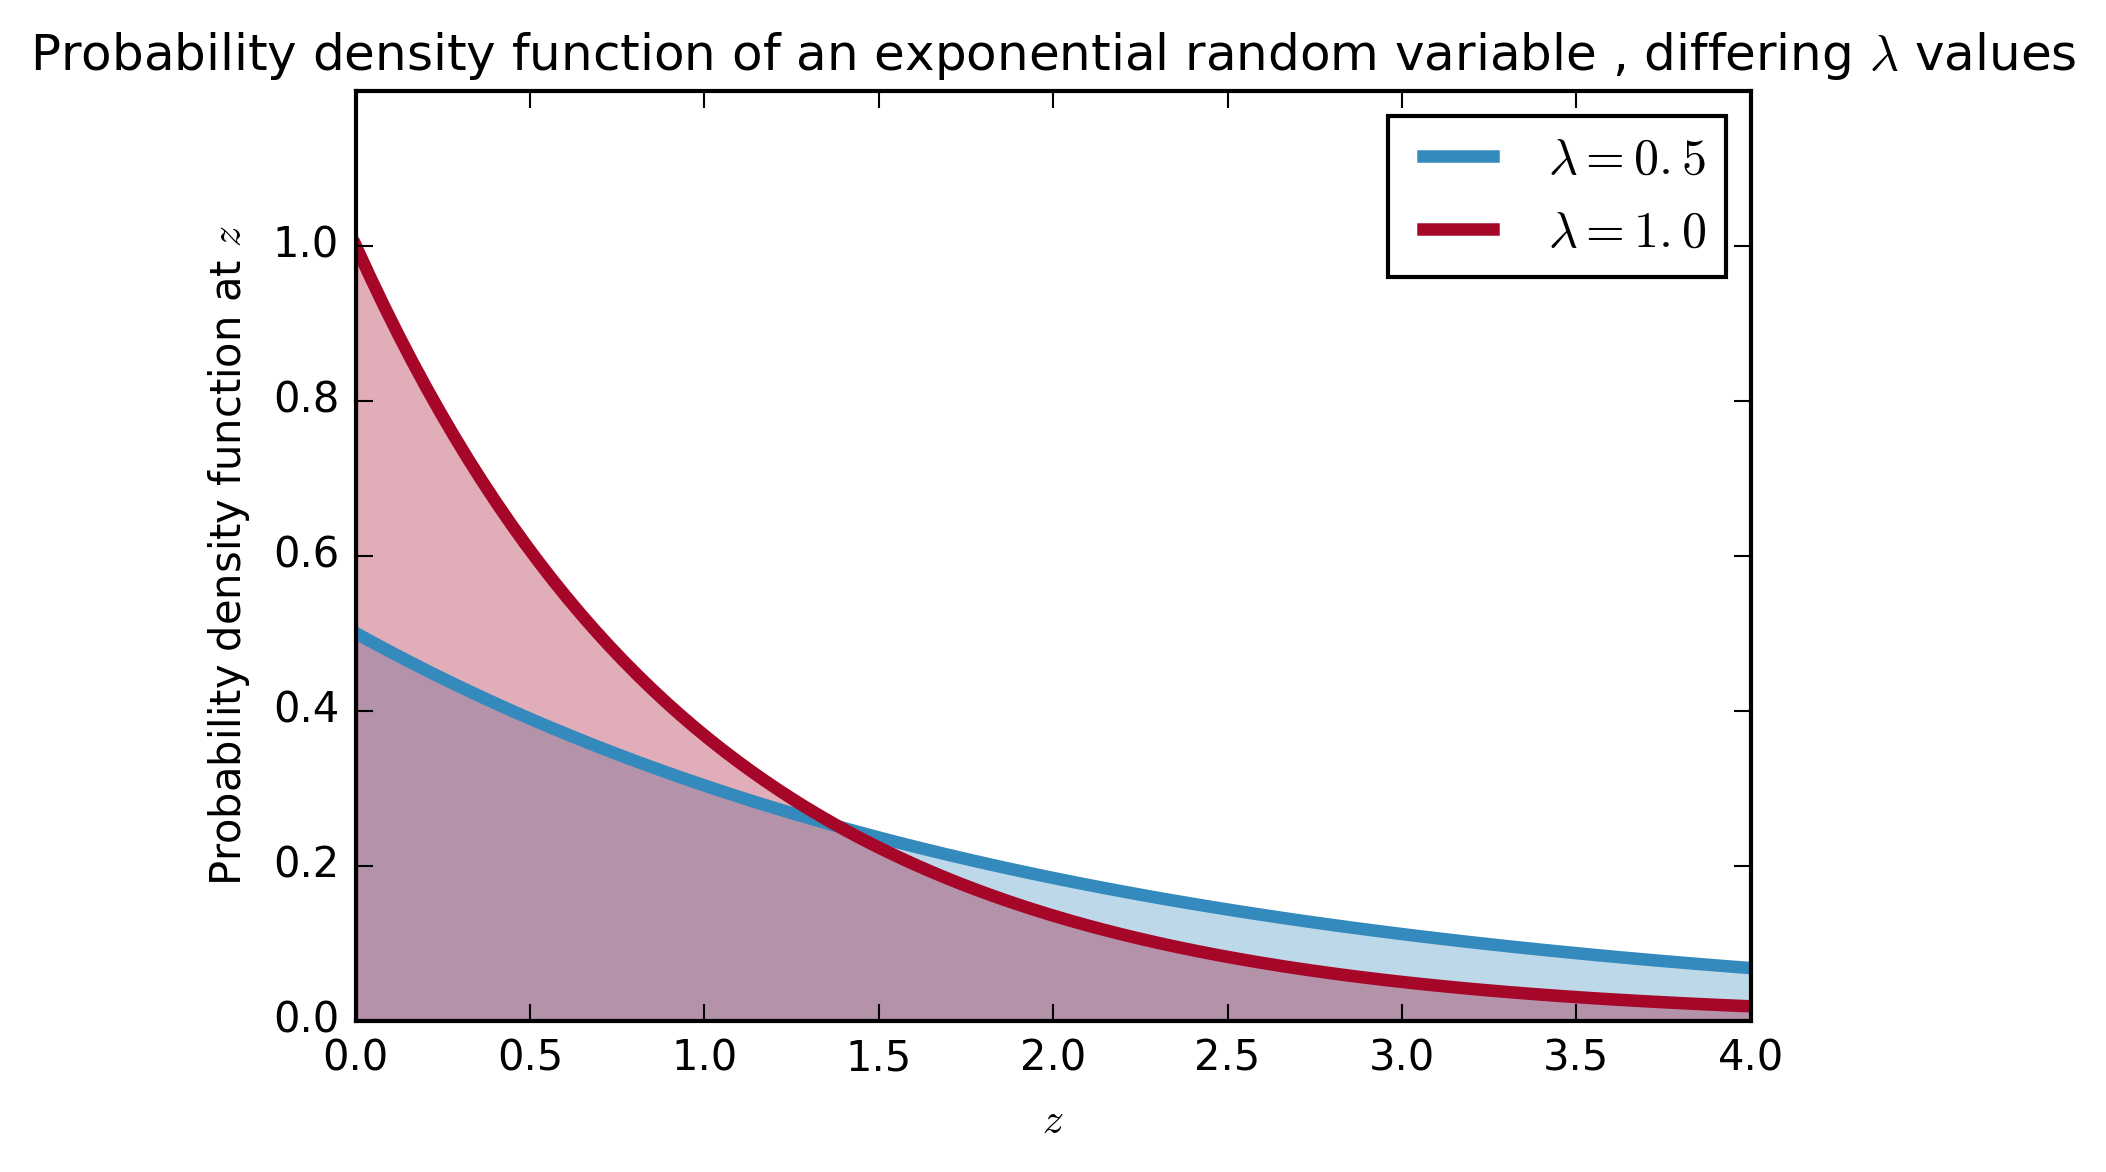

In [5]:
%matplotlib inline

from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

a = np.linspace(0,4,100)

expo = stats.expon
lambda_ =  [0.5, 1]
for l, c in zip(lambda_, colors):
  plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
          color=c, label="$\lambda = %.1f$" % l)
  plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)
  plt.legend()
  plt.ylabel("Probability density function at $z$")
  plt.xlabel("$z$")
  plt.ylim(0,1.2)
  plt.title("Probability density function of an exponential random variable , differing $\lambda$ values")

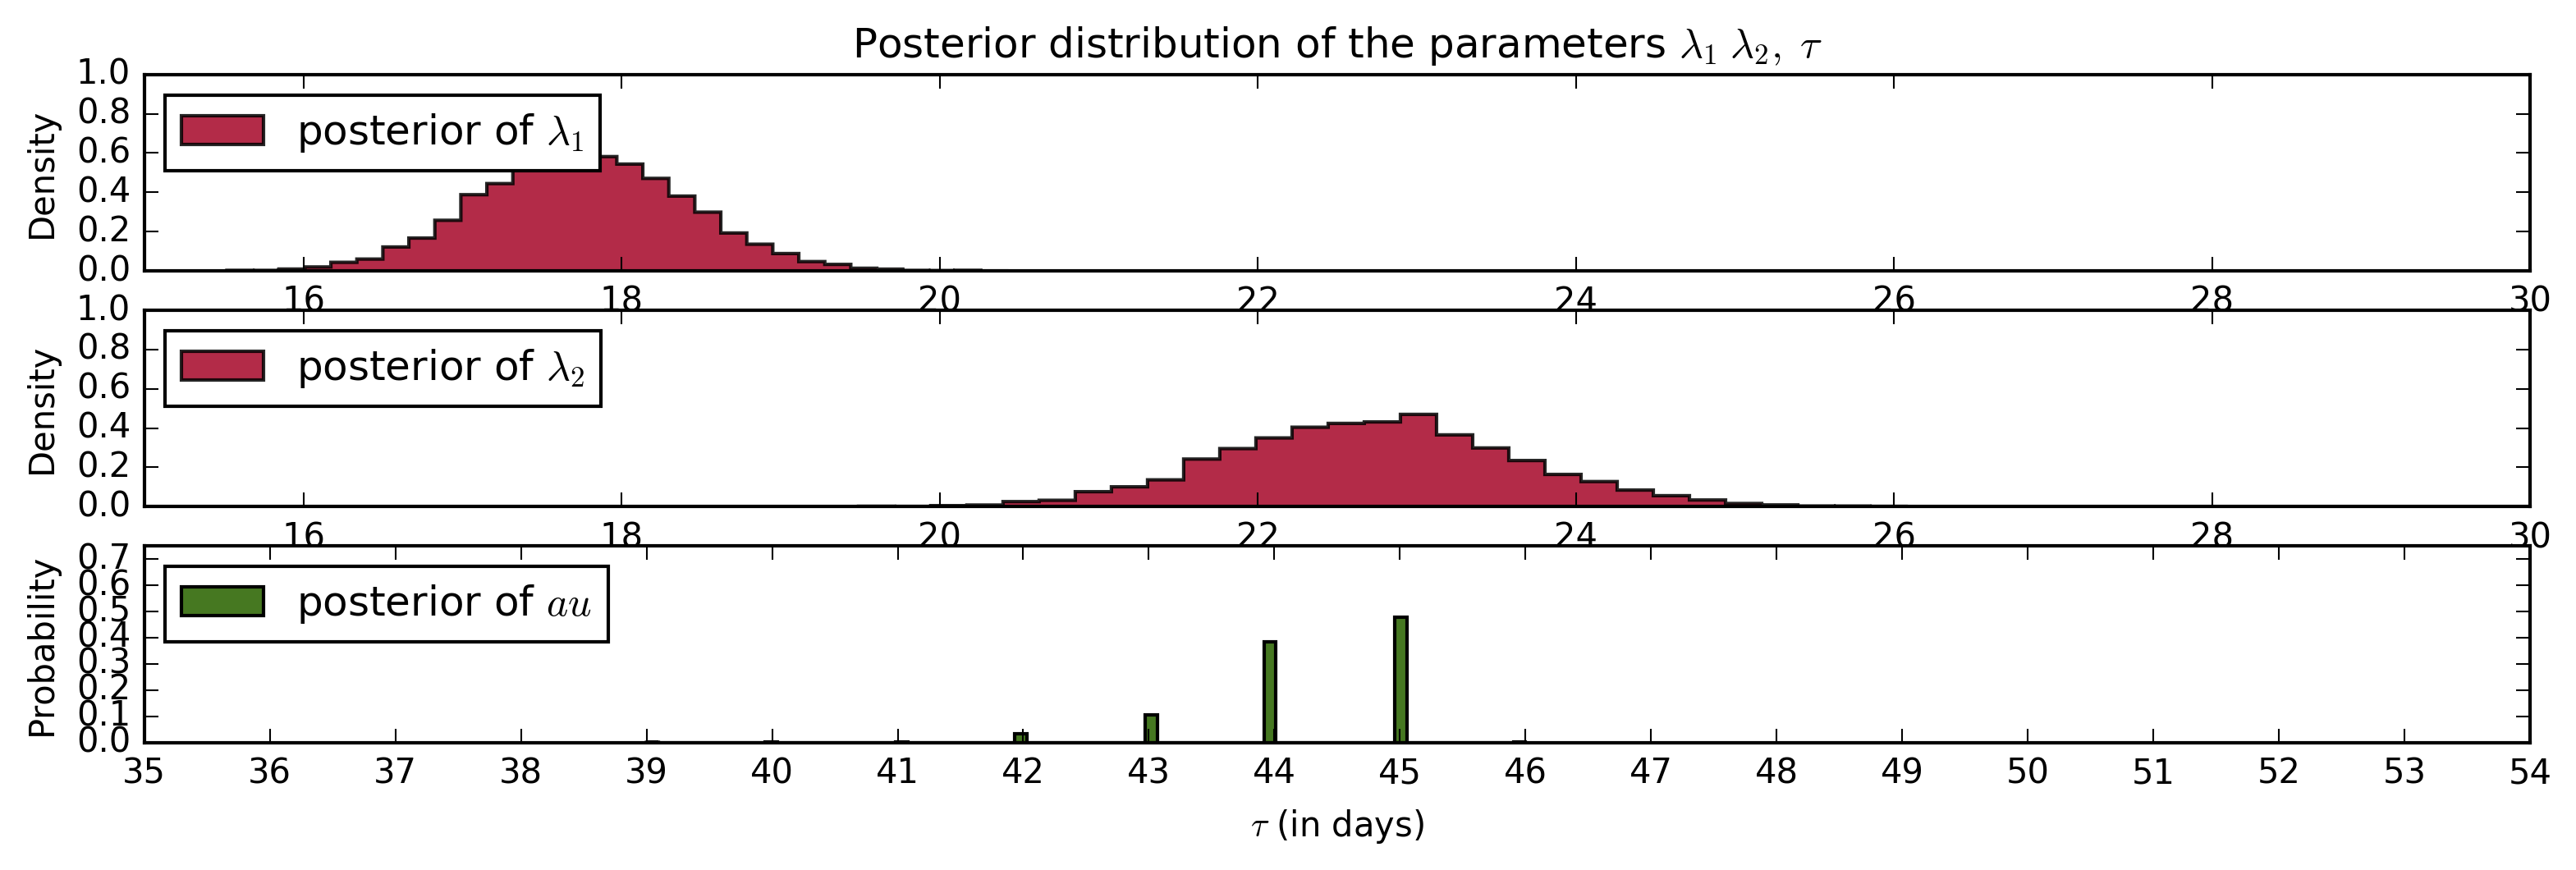

 [-----------------100%-----------------] 40000 of 40000 complete in 4.6 sec

 [-----------------98%----------------- ] 39315 of 40000 complete in 4.5 sec

 [-----------------87%-------------     ] 35186 of 40000 complete in 4.0 sec

 [-----------------77%---------         ] 31071 of 40000 complete in 3.5 sec

 [-----------------67%-----             ] 26961 of 40000 complete in 3.0 sec

 [-----------------57%-                 ] 22897 of 40000 complete in 2.5 sec

 [-----------------46%                  ] 18770 of 40000 complete in 2.0 sec

 [-------------    36%                  ] 14671 of 40000 complete in 1.5 sec

 [---------        26%                  ] 10461 of 40000 complete in 1.0 sec

 [-----            13%                  ] 5391 of 40000 complete in 0.5 sec

In [6]:
%matplotlib inline

figsize(12.5, 3.5)
count_data = np.loadtxt('data/txtdata.csv')
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color=colors[0])
plt.xlabel('Time (days)')
plt.ylabel('Text messages received')
plt.xlim(0, n_count_data)

import pymc as pm

alpha = 1.0/count_data.mean()
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

@pm.deterministic
def lambda_ (tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
  out = np.zeros(n_count_data)
  out[:tau] = lambda_1
  out[tau:] = lambda_2
  return out

observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)
model = pm.Model([observation, lambda_1, lambda_2, tau])

mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)
colors = ["#A60628", "#7A68A6",  "#467821"]
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]

tau_samples = mcmc.trace('tau')[:]

figsize(14.5,10)

ax = plt.subplot(311)

ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85, label='posterior of $\lambda_1$', color=colors[0], normed=True)
plt.legend(loc='upper left')
plt.title(r"""Posterior distribution of the parameters $\lambda_1\;\lambda_2,\;\tau$""")
plt.xlim([15,30])
plt.xlabel('$\lambda_1$ value')
plt.ylabel('Density')

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85, label='posterior of $\lambda_2$', color=colors[0], normed=True)
plt.legend(loc='upper left')
plt.xlim([15,30])
plt.xlabel('$\lambda_2$ value')
plt.ylabel('Density')

ax = plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)

plt.hist(tau_samples,  bins=n_count_data, alpha=1, label='posterior of $\tau$', color=colors[2], weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc='upper left')
plt.xlim([35, len(count_data) - 20])
plt.ylim([0,0.75])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel('Probability')





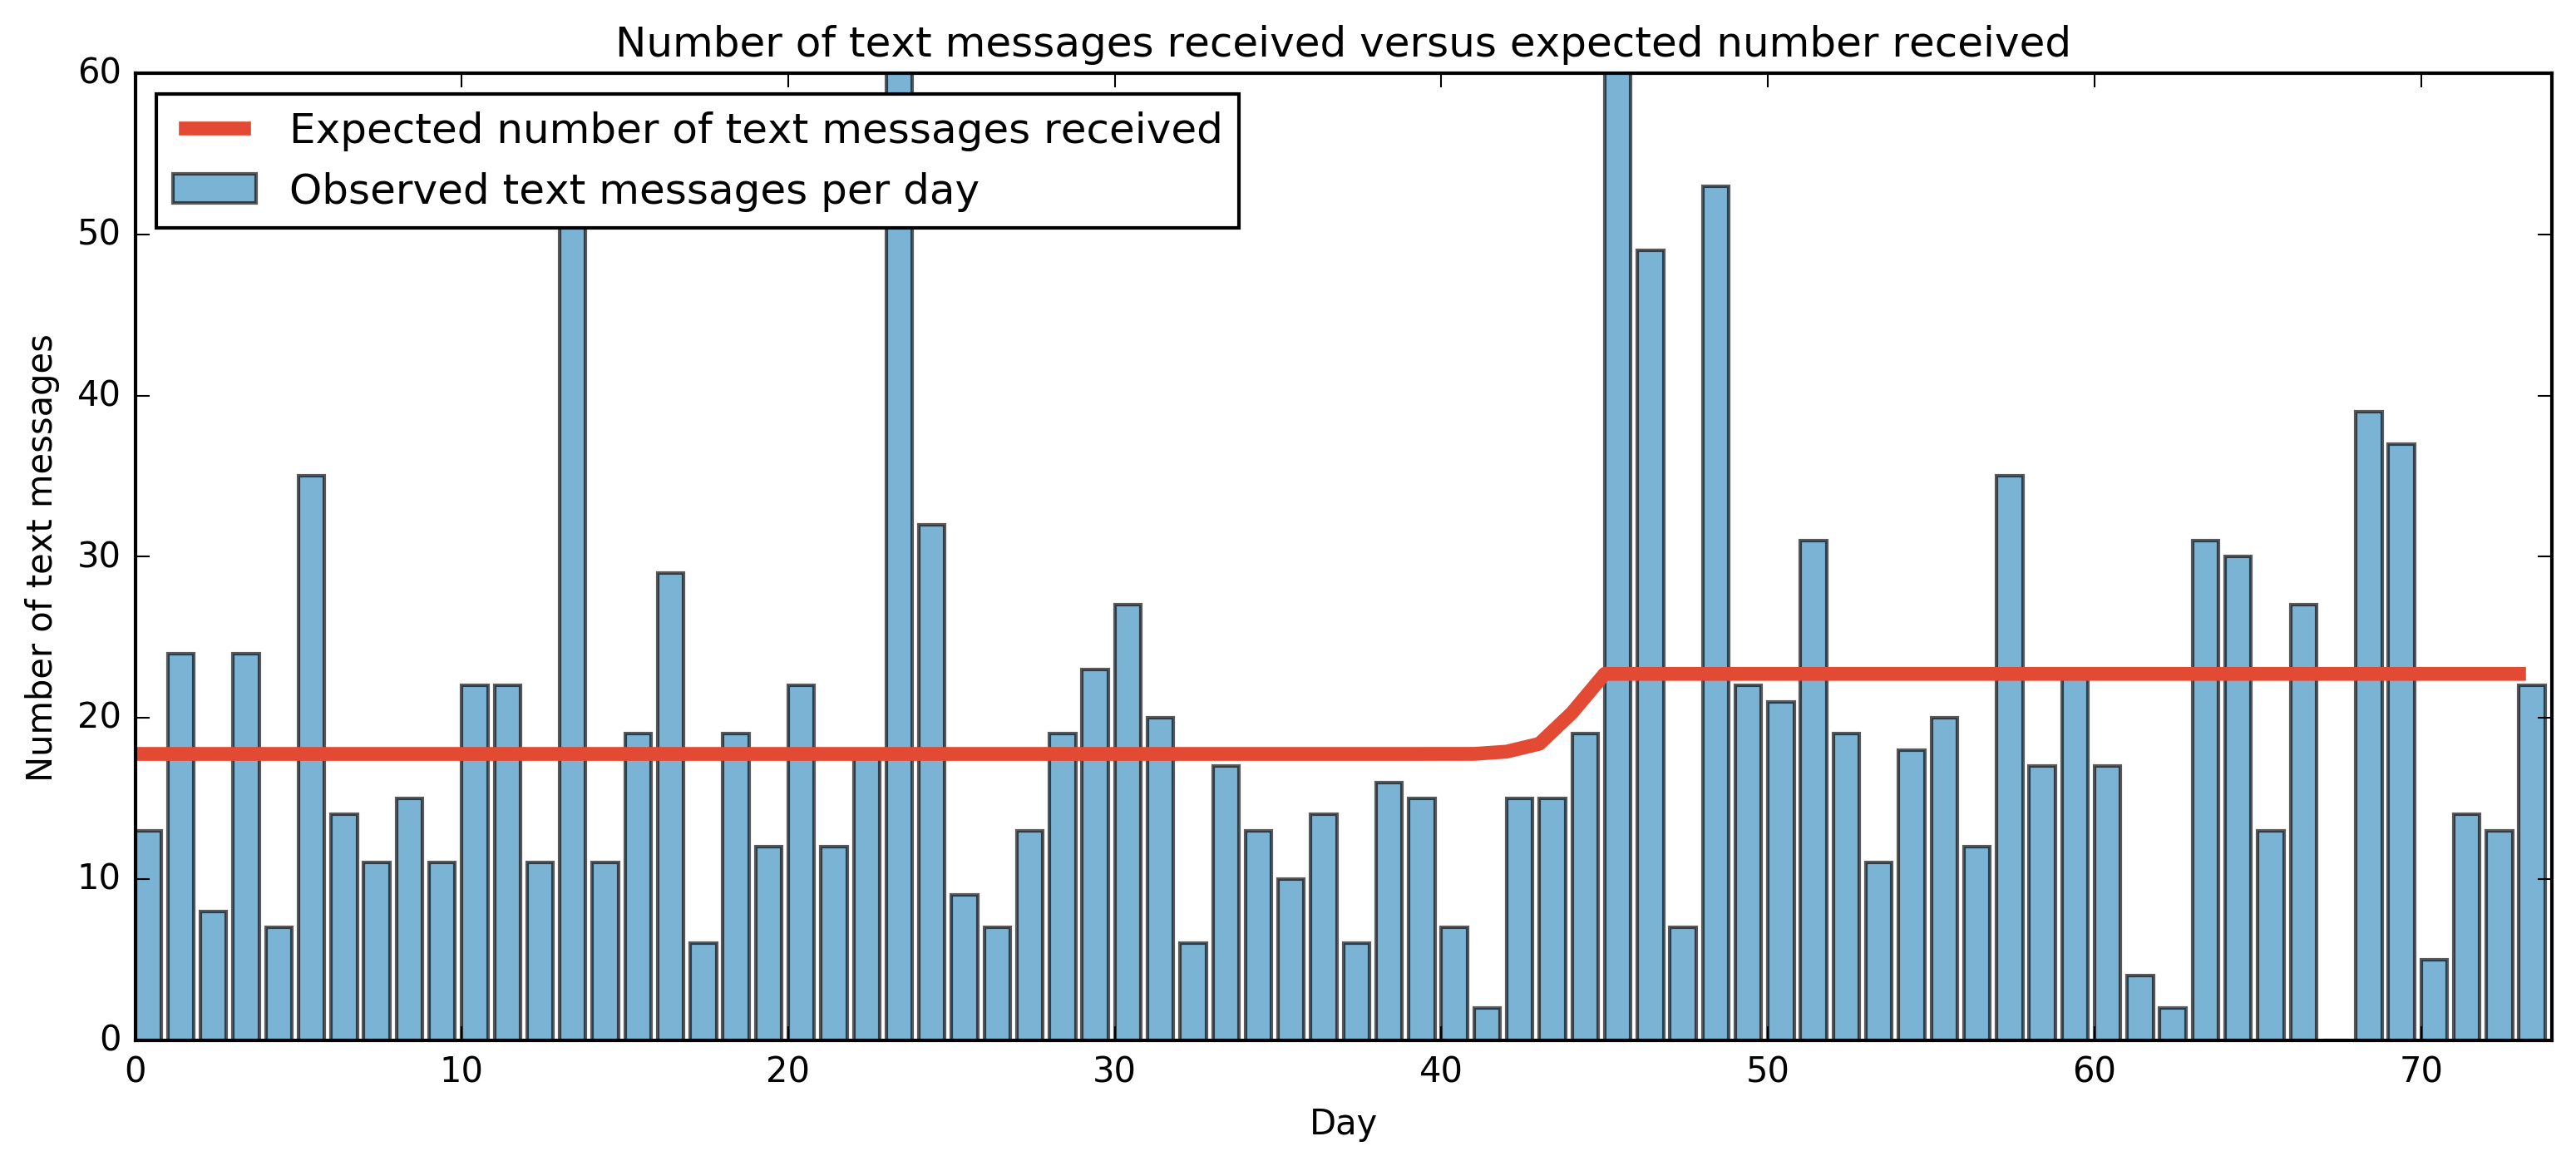

[ 17.75354669  17.75354669  17.75354669  17.75354669  17.75354669
  17.75354669  17.75354669  17.75354669  17.75354669  17.75354669
  17.75354669  17.75354669  17.75354669  17.75354669  17.75354669
  17.75354669  17.75354669  17.75354669  17.75354669  17.75354669
  17.75354669  17.75354669  17.75354669  17.75354669  17.75354669
  17.75354669  17.75354669  17.75354669  17.75354669  17.75354669
  17.75354669  17.75354669  17.75354669  17.75354669  17.75354669
  17.75354669  17.75354669  17.75354669  17.75354669  17.75357143
  17.75499888  17.7563646   17.89670636  18.38136747  20.30499785
  22.72027853  22.72034217  22.72034217  22.72034217  22.72034217
  22.72034217  22.72034217  22.72034217  22.72034217  22.72034217
  22.72034217  22.72034217  22.72034217  22.72034217  22.72034217
  22.72034217  22.72034217  22.72034217  22.72034217  22.72034217
  22.72034217  22.72034217  22.72034217  22.72034217  22.72034217
  22.72034217  22.72034217  22.72034217  22.72034217]


In [10]:
%matplotlib inline

figsize(12.5,5)

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range (0, n_count_data):
  ix = day < tau_samples
  expected_texts_per_day[day] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N
plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33", label='Expected number of text messages received')
plt.xlim(0, n_count_data)
plt.xlabel('Day')
plt.ylabel('Number of text messages')
plt.title('Number of text messages received versus expected number received')
plt.ylim(0,60)
plt.bar(np.arange(len(count_data)), count_data, color='#348ABD', alpha=0.65, label='Observed text messages per day')
plt.legend(loc='upper left')
print expected_texts_per_day
